In [5]:
# data/imdb_data.py

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(max_features=10000, max_len=200):
    # Load IMDB dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)

    # Pad sequences (each review to have the same length)
    x_train = pad_sequences(x_train, maxlen=max_len)
    x_test = pad_sequences(x_test, maxlen=max_len)

    return (x_train, y_train), (x_test, y_test)


In [6]:
# models/rnn_model.py

import tensorflow as tf
from tensorflow.keras import layers, models

def build_rnn_model(input_shape=(200,), max_features=10000):
    model = models.Sequential([
        layers.Embedding(input_dim=max_features, output_dim=128, input_length=input_shape[0]),
        layers.LSTM(64, return_sequences=False),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Binary cross-entropy for binary classification
                  metrics=['accuracy'])
    return model


In [7]:
# train.py

import tensorflow as tf
# from data.imdb_data import load_data
# from models.rnn_model import build_rnn_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load IMDB data
(x_train, y_train), (x_test, y_test) = load_data()

# Build the RNN model
model = build_rnn_model()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train the model
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr],
                    batch_size=64)

# Save the trained model
model.save('rnn_imdb_model.keras')

# Save the training history
import pickle
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 160s 402ms/step - accuracy: 0.7006 - loss: 0.5351 - val_accuracy: 0.8579 - val_loss: 0.3297 - learning_rate: 0.0010
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 186s 362ms/step - accuracy: 0.9058 - loss: 0.2462 - val_accuracy: 0.8668 - val_loss: 0.3453 - learning_rate: 0.0010
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 150s 383ms/step - accuracy: 0.9378 - loss: 0.1717 - val_accuracy: 0.8521 - val_loss: 0.3954 - learning_rate: 0.0010
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 386ms/step - accuracy: 0.9553 - loss: 0.1244 - val_accuracy: 0.8584 - val_loss: 0.3985 - learning_rate: 0.0010
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 196s 369ms/step - accuracy: 0.9786 - loss: 0.0668 - val_accuracy: 0.8690 - val_loss: 0.5408 - learning_rate: 5.0000e-04
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 157s 402ms/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.8626 - val_loss: 0.6756 - learning_rate: 5.0000e-04


In [9]:
# evaluate.py

import tensorflow as tf
# from data.imdb_data import load_data

# Load IMDB data
(x_train, y_train), (x_test, y_test) = load_data()

# Load the trained model
model = tf.keras.models.load_model('rnn_imdb_model.keras')

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


782/782 - 28s - 35ms/step - accuracy: 0.8579 - loss: 0.3297

Test accuracy: 0.8578799962997437


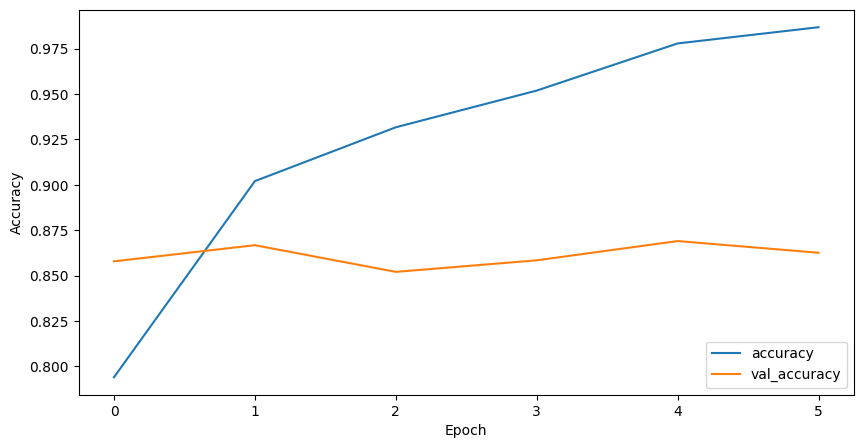

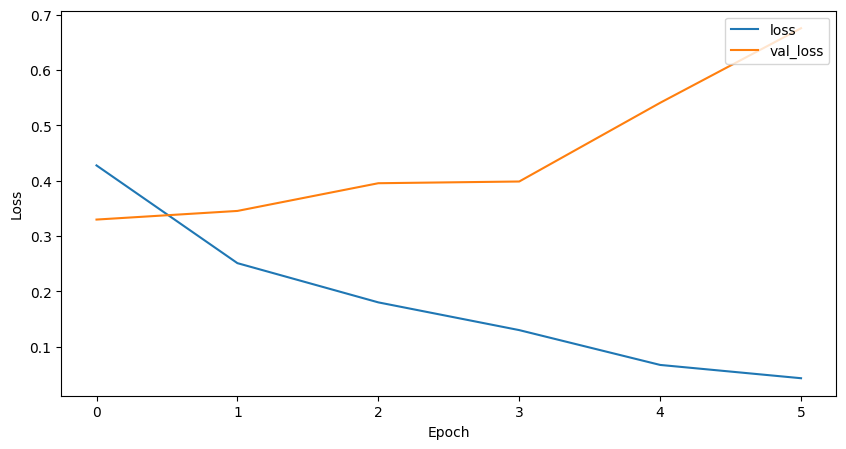

In [10]:
# utils/plot_history.py

import matplotlib.pyplot as plt
import pickle

def plot_history(history_file='history.pkl'):
    with open(history_file, 'rb') as f:
        history = pickle.load(f)

    plt.figure(figsize=(10, 5))
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

if __name__ == '__main__':
    plot_history()
